In [5]:
from pathlib import Path
import sys
sys.path.append(str(Path().resolve().parent))
import os
os.environ['OMP_NUM_THREADS'] = "1"
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


In [6]:
from scikit_quri.qnn.kernel_tsne import quantum_kernel_tsne, pqc_f_helper
import numpy as np
from quri_parts.circuit import H, CZ
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import MinMaxScaler
from scikit_quri.circuit import LearningCircuit
from quri_parts.core.state import quantum_state
from numpy.typing import NDArray
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

def create_quantum_circuit():
    qc = LearningCircuit(n_qubits)

    def preprocess_x(x: NDArray[np.float_], index: int) -> float:
        xa = x[index % len(x)]
        return min(1, max(-1, xa))

    for i in range(n_qubits):
        qc.add_gate(H(i))
    for d in range(depth):
        for i in range(n_qubits):
            qc.add_input_RY_gate(i, lambda x, i=i: preprocess_x(x, i))
        for i in range(n_qubits):
            qc.add_input_RX_gate(i, lambda x, i=i: preprocess_x(x, i))
        if d < depth - 1:
            for i in range(n_qubits):
                qc.add_gate(CZ(i, (i + 1) % n_qubits))
    return qc
# X, Y = load_iris(return_X_y=True)
X,Y = load_digits(return_X_y=True)
X = X / 16.
n_features = 12

skf = StratifiedKFold()
for tr_index, te_index in skf.split(X,Y):
    break
X_train = X[tr_index]
X_test = X[te_index]
y_train = Y[tr_index]
y_test = Y[te_index]
print(f"{X_train.shape=}")

pca = PCA(n_components=n_features)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
# X_train = X_train / 16.
# X_train = X_train[:200]
# y_train = y_train[:200] #500 => fidelity 81.6[s]
scaler = MinMaxScaler((0, np.pi / 2))
n_qubits = 12
depth = 1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
qk_tsne = quantum_kernel_tsne(max_iter=2000)
X_train_state = np.zeros(len(X_train),dtype=object)
pqc = create_quantum_circuit()
for i,x in enumerate(X_train):
    X_train_state[i] = (quantum_state(n_qubits=n_qubits,circuit=pqc.bind_input_and_parameters(x,[])))
p_probs = (qk_tsne.tsne.calc_probabilities_p_state(X_train_state))
# print(f"{p_probs=}")
qk_tsne.init(create_quantum_circuit, [])
# qk_tsne.train(X_train, y_train, method="COBYLA")


X_train.shape=(1437, 64)
0/1437
1/1437
2/1437
3/1437
4/1437
5/1437
6/1437
7/1437
8/1437
9/1437
10/1437
11/1437
12/1437
13/1437
14/1437
15/1437
16/1437
17/1437
18/1437
19/1437
20/1437
21/1437
22/1437
23/1437
24/1437
25/1437
26/1437
27/1437
28/1437
29/1437
30/1437
31/1437
32/1437
33/1437
34/1437
35/1437
36/1437
37/1437
38/1437
39/1437
40/1437
41/1437
42/1437
43/1437
44/1437
45/1437
46/1437
47/1437
48/1437
49/1437
50/1437
51/1437
52/1437
53/1437
54/1437
55/1437
56/1437
57/1437
58/1437
59/1437
60/1437
61/1437
62/1437
63/1437
64/1437
65/1437
66/1437
67/1437
68/1437
69/1437
70/1437
71/1437
72/1437
73/1437
74/1437
75/1437
76/1437
77/1437
78/1437
79/1437
80/1437
81/1437
82/1437
83/1437
84/1437
85/1437
86/1437
87/1437
88/1437
89/1437
90/1437
91/1437
92/1437
93/1437
94/1437
95/1437
96/1437
97/1437
98/1437
99/1437
100/1437
101/1437
102/1437
103/1437
104/1437
105/1437
106/1437
107/1437
108/1437
109/1437
110/1437
111/1437
112/1437
113/1437
114/1437
115/1437
116/1437
117/1437
118/1437
119/1437
120/1

In [7]:
fidelity = qk_tsne.calc_fidelity(X_train, X_train,qk_tsne.pqs_f_helper)
print(fidelity)

0/1437
1/1437
2/1437
3/1437
4/1437
5/1437
6/1437
7/1437
8/1437
9/1437
10/1437
11/1437
12/1437
13/1437
14/1437
15/1437
16/1437
17/1437
18/1437
19/1437
20/1437
21/1437
22/1437
23/1437
24/1437
25/1437
26/1437
27/1437
28/1437
29/1437
30/1437
31/1437
32/1437
33/1437
34/1437
35/1437
36/1437
37/1437
38/1437
39/1437
40/1437
41/1437
42/1437
43/1437
44/1437
45/1437
46/1437
47/1437
48/1437
49/1437
50/1437
51/1437
52/1437
53/1437
54/1437
55/1437
56/1437
57/1437
58/1437
59/1437
60/1437
61/1437
62/1437
63/1437
64/1437
65/1437
66/1437
67/1437
68/1437
69/1437
70/1437
71/1437
72/1437
73/1437
74/1437
75/1437
76/1437
77/1437
78/1437
79/1437
80/1437
81/1437
82/1437
83/1437
84/1437
85/1437
86/1437
87/1437
88/1437
89/1437
90/1437
91/1437
92/1437
93/1437
94/1437
95/1437
96/1437
97/1437
98/1437
99/1437
100/1437
101/1437
102/1437
103/1437
104/1437
105/1437
106/1437
107/1437
108/1437
109/1437
110/1437
111/1437
112/1437
113/1437
114/1437
115/1437
116/1437
117/1437
118/1437
119/1437
120/1437
121/1437
122/1437
123

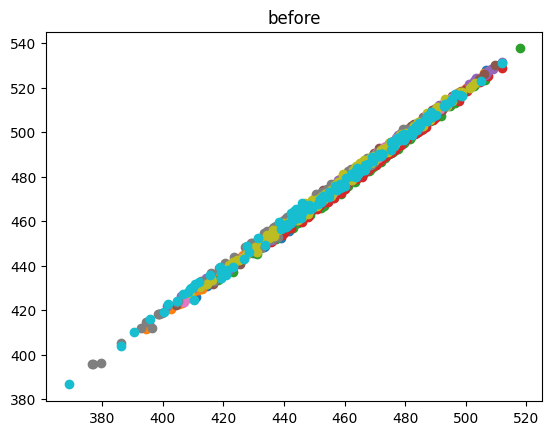

In [8]:
from functools import partial
cost_f = partial(qk_tsne.cost_f,p_prob=p_probs,fidelity=fidelity)
n_data = len(X_train)
alpha = np.random.rand(n_data * 2)
y_label = y_train
qk_tsne.plot(qk_tsne.calc_y(fidelity, alpha.reshape(n_data, 2)), y_label, "before")

In [9]:
from scipy.optimize import minimize
res = minimize(cost_f, alpha, method="COBYLA", options={"maxiter": 2000})

loss=3.817235882283065
loss=3.8160347211929606
loss=3.817397949499071
loss=3.813944169084825
loss=3.8159591709524996
loss=3.8148215580105598
loss=3.8130821271460973
loss=3.811361002538802
loss=3.8129266687567
loss=3.8115467154012284
loss=3.811426127010294
loss=3.810315353664935
loss=3.8116209935480905
loss=3.8083433569883542
loss=3.810500768563496
loss=3.808945792134544
loss=3.8075091013685007
loss=3.8081887635201057
loss=3.806721077008962
loss=3.8082516949493335
loss=3.805227150100152
loss=3.804570932669499
loss=3.8052353523087183
loss=3.806147125516178
loss=3.8034158381689847
loss=3.8019233285781118
loss=3.803588922167664
loss=3.799703929285073
loss=3.8020364172419874
loss=3.79715566578663
loss=3.799738819842436
loss=3.7959928759732127
loss=3.7971355031882505
loss=3.7986321384907757
loss=3.793943918573056
loss=3.7951934382410193
loss=3.7929745808305215
loss=3.791974516765914
loss=3.7929154094357633
loss=3.793069230726316
loss=3.7908905905444295
loss=3.7919713984816283
loss=3.78992703

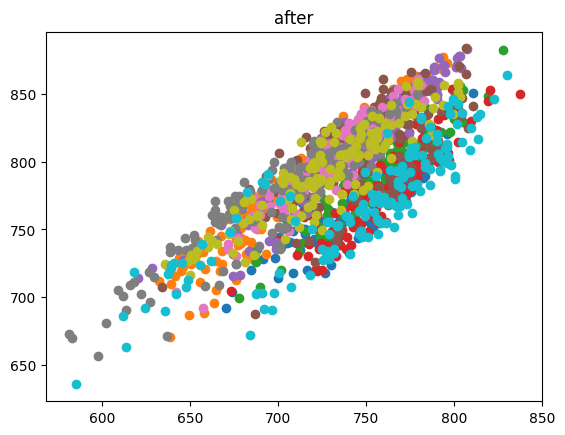

In [10]:
y = qk_tsne.calc_y(fidelity, res.x.reshape(n_data, 2))
qk_tsne.plot(y, y_label, "after")

In [11]:
qk_tsne.transform(X_test)

In [12]:
from scipy.spatial import distance
# M = np.random.randint(0, 10, (5, 2))
M = np.array([[np.random.rand()] for _ in range(5) ])
cdist = distance.cdist(M,M)
print(cdist)

[[0.         0.62038252 0.51101444 0.50501836 0.34195594]
 [0.62038252 0.         0.10936808 0.11536416 0.27842658]
 [0.51101444 0.10936808 0.         0.00599608 0.1690585 ]
 [0.50501836 0.11536416 0.00599608 0.         0.16306242]
 [0.34195594 0.27842658 0.1690585  0.16306242 0.        ]]


In [13]:
print(f"{M=}")
x1_norm = np.sum(M**2,axis=1)[:,np.newaxis]
print(f"{x1_norm=}")
x1_pad = np.ones_like(x1_norm)
print(f"{x1_norm.shape=}")
print(f"{x1_pad.shape=}")
print(f"{(-2*M).shape=}")
# phi = np.concatenate((-2*M,np.sum(M**2,axis=1),np.ones((len(M),1))))
psi = np.concatenate((-2*M,x1_norm,x1_pad),axis=1)
print(psi)

M=array([[0.03459161],
       [0.65497412],
       [0.54560604],
       [0.53960997],
       [0.37654754]])
x1_norm=array([[0.00119658],
       [0.4289911 ],
       [0.29768596],
       [0.29117891],
       [0.14178805]])
x1_norm.shape=(5, 1)
x1_pad.shape=(5, 1)
(-2*M).shape=(5, 1)
[[-6.91832101e-02  1.19657914e-03  1.00000000e+00]
 [-1.30994824e+00  4.28991101e-01  1.00000000e+00]
 [-1.09121209e+00  2.97685955e-01  1.00000000e+00]
 [-1.07921993e+00  2.91178915e-01  1.00000000e+00]
 [-7.53095087e-01  1.41788052e-01  1.00000000e+00]]


In [14]:
x2_norm = np.sum(M**2,axis=1)[:,np.newaxis]
x2_pad = np.ones_like(x2_norm)
phi = np.concatenate((M,x2_pad,x2_norm),axis=1)
print(phi)

[[0.03459161 1.         0.00119658]
 [0.65497412 1.         0.4289911 ]
 [0.54560604 1.         0.29768596]
 [0.53960997 1.         0.29117891]
 [0.37654754 1.         0.14178805]]


In [15]:
D_2 = psi @ phi.T
D_2 = np.sqrt(D_2)
print(D_2)

[[0.         0.62038252 0.51101444 0.50501836 0.34195594]
 [0.62038252 0.         0.10936808 0.11536416 0.27842658]
 [0.51101444 0.10936808 0.         0.00599608 0.1690585 ]
 [0.50501836 0.11536416 0.00599608 0.         0.16306242]
 [0.34195594 0.27842658 0.1690585  0.16306242 0.        ]]


In [16]:
np.isclose(D_2,cdist)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [18]:
# import torch
# from inspect import getsource,getfile
# M = np.array([[np.random.rand()] for _ in range(6) ])
# M_t = torch.tensor(M,dtype=torch.float64,requires_grad=True)
# cdist = torch.cdist(M_t,M_t)
# print(f"{getfile(cdist.grad_fn)=}")
# print(f"{dir(cdist.grad_fn)=}")
# s = torch.sum(cdist)
# s.backward()
# print(f"{M_t.grad=}")

In [33]:
# grad